In [2]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install libpysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 42.2 MB/s eta 0:00:00


In [6]:
pip install mgwr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 kB 15.6 MB/s eta 0:00:00
  Created wheel for mgwr: filename=mgwr-2.1.2-py3-none-any.whl size=46365 sha256=8ac135ff7efb687fdf42f014ba633a52f1bcc536c75bccd4e8ae8b8fad92cde2
  Stored in directory: /root/.cache/pip/wheels/4d/43/6e/bd2d0e1ccee77089e0b266ebc4948d9a90ef363e0be23663aa
  Created wheel for spglm: filename=spglm-1.0.8-py3-none-any.whl size=38785 sha256=5cedc57d98d70d10d07a19733108eb5331a8bcc4b125f92371219ca6cc430086
  Stored in directory: /root/.cache/pip/wheels/a2/a7/67/07d6d6809173d768c16235f813520d6a4053984a160aa933fa
Successfully built mgwr spglm


In [7]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 101.6 MB/s eta 0:00:00


In [8]:
import numpy as np
import libpysal as ps
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import geopandas as gp

from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

In [9]:
from google.colab import files
uploaded = files.upload()

Saving landslides.csv to landslides.csv


In [10]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [11]:
import pandas as pd
clearwater_data=pd.read_csv('/content/landslides.csv')
print(clearwater_data)

     UserID            X            Y       Elev     Slope  SinAspct  \
0         1  616168.5625  5201076.500  1450.4750  27.44172  0.409126   
1         2  624923.8125  5201008.500  1567.4760  21.88343 -0.919245   
2         3  615672.0000  5199187.500  1515.0650  38.81030 -0.535024   
3         4  615209.3125  5199112.000  1459.8270  26.71631 -0.828548   
4         5  616354.6875  5198945.500  1379.4420  27.55271 -0.872281   
..      ...          ...          ...        ...       ...       ...   
234     235  612445.4671  5194328.622  1745.4070  20.65032 -0.648628   
235     236  610288.3161  5176959.211   947.0723  24.71648  0.158009   
236     237  602866.8612  5198870.173  1445.7090  20.90806 -0.579944   
237     238  623024.8193  5194185.201  1103.1600  32.44582  0.249263   
238     239  620219.8678  5189947.304  1050.4200  48.82713 -0.984882   

     CosAspct  AbsSouth  Landslid  DistStrm  
0   -0.912478   24.1499         1     8.506  
1   -0.393685   66.8160         1    15.561

Mounted at /content/drive


<Axes: >

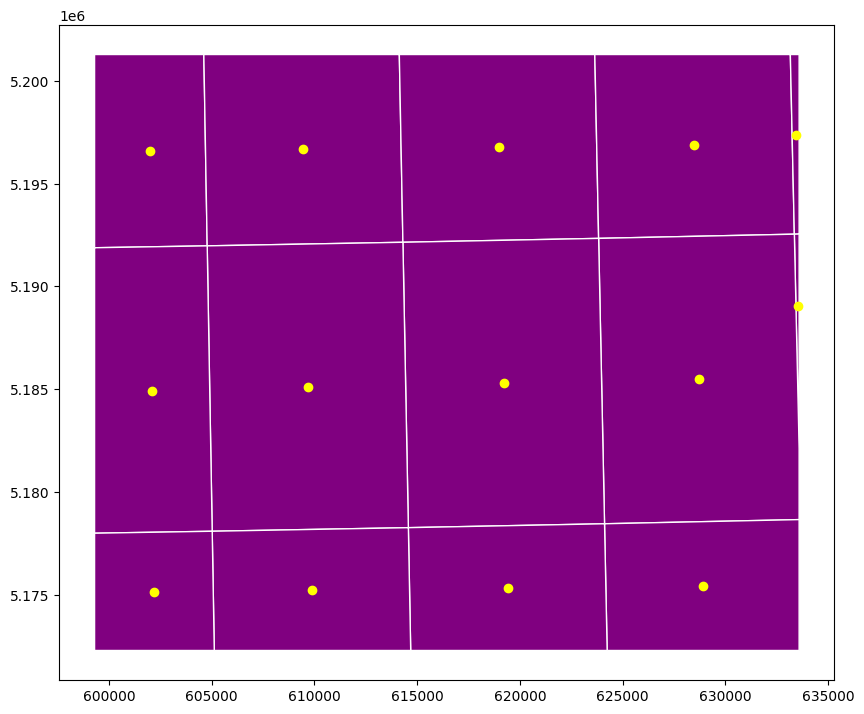

In [15]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
datacw=pd.read_csv('/content/drive/MyDrive/Tugas Praktikum II Statistika Spasial/landslides.csv')
datacw.head()
cw_shp=gp.read_file('/content/drive/MyDrive/Tugas Praktikum II Statistika Spasial/quads.shp')
fig, ax = plt.subplots(figsize=(10,10))
cw_shp.plot(ax=ax, **{'edgecolor':'white', 'facecolor':'purple'})
cw_shp.centroid.plot(ax=ax, c='yellow')

In [16]:
import geopandas as gp
clearwater_shp2=gp.read_file('/content/drive/MyDrive/Tugas Praktikum II Statistika Spasial/streams.shp')

<Axes: >

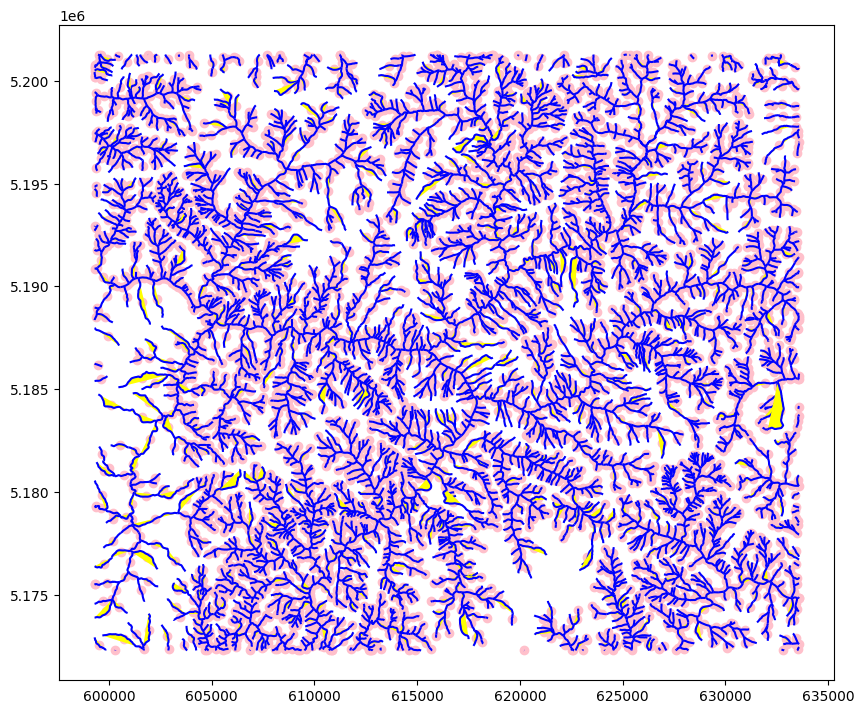

In [20]:
#Load streams shp
fig, ax = plt.subplots(figsize=(10,10))
clearwater_shp2.plot(ax=ax, **{'edgecolor':'blue', 'facecolor':'yellow'})
clearwater_shp2.centroid.plot(ax=ax, c='pink')

In [17]:
# Tentukan variabel bebas dan terikatnya
g_y = datacw['Elev'].values.reshape((-1,1))
g_X = datacw[['Slope', 'SinAspct', 'CosAspct']].values
# Tentukan Latitude dan Longitude
u = datacw['X']
v = datacw['Y']
g_coords = list(zip(u,v))

g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)

g_y = g_y.reshape((-1,1))

g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

In [21]:
# Kalibrate GWR model
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(g_coords, g_y, g_X, gwr_bw).fit()

44.0


In [22]:
# Kalibrate GWR model
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(g_coords, g_y, g_X, gwr_bw).fit()

44.0


In [23]:
gwr_results.localR2[0:10]

array([[0.45272703],
       [0.48715549],
       [0.44347056],
       [0.43878454],
       [0.43597402],
       [0.41271618],
       [0.36830782],
       [0.41222942],
       [0.40122689],
       [0.41490011]])

In [24]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 239
Number of covariates:                                                     4

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            233.973
Log-likelihood:                                                    -336.586
AIC:                                                                681.172
AICc:                                                               683.429
BIC:                                                              -1052.996
R2:                                                                   0.021
Adj. R2:                                                              0.009

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------